In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import itertools
import warnings
import pickle

In [58]:
dataset = pd.read_csv('BTD_dataset.csv', delimiter=';')
# gender	age	  hypertension	heart_disease	smoking_history  	bmi	  HbA1c_level	blood_glucose_level	  diabetes
df = dataset
df = df.drop_duplicates()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95428 entries, 0 to 99374
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               95428 non-null  object 
 1   age                  95428 non-null  float64
 2   hypertension         95428 non-null  int64  
 3   heart_disease        95428 non-null  int64  
 4   smoking_history      95428 non-null  object 
 5   bmi                  95428 non-null  float64
 6   HbA1c_level          95428 non-null  float64
 7   blood_glucose_level  95428 non-null  int64  
 8   diabetes             95428 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


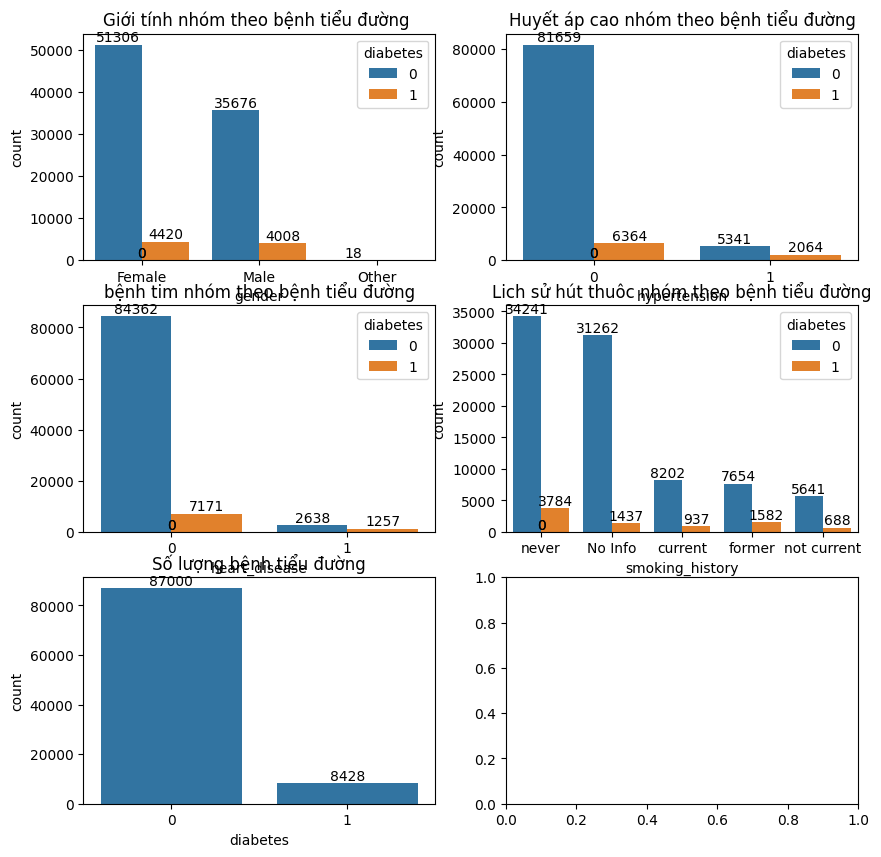

In [59]:
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
ax = sns.countplot(ax=axes[0, 0], x='gender', hue='diabetes', data=df)
axes[0, 0].set_title('Giới tính nhóm theo bệnh tiểu đường ')
add_counts(ax)

ax = sns.countplot(ax=axes[0, 1], x='hypertension', hue='diabetes', data=df)
axes[0, 1].set_title('Huyết áp cao nhóm theo bệnh tiểu đường')
add_counts(ax)

ax = sns.countplot(ax=axes[1, 0], x='heart_disease', hue='diabetes', data=df)
axes[1, 0].set_title('bệnh tim nhóm theo bệnh tiểu đường')
add_counts(ax)

ax = sns.countplot(ax=axes[1, 1], x='smoking_history', hue='diabetes', data=df)
axes[1, 1].set_title('Lich sử hút thuôc nhóm theo bệnh tiểu đường')
add_counts(ax)

ax = sns.countplot(ax=axes[2, 0], x='diabetes', data=df)
axes[2, 0].set_title("Số lượng bệnh tiểu đường")
add_counts(ax)

In [60]:
diabetes_counts = df['diabetes'].value_counts()
# startangle=90 vẽ từ góc 90 độ
axes[2, 1].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
axes[2, 1].set_title('Diabetes Distribution')
# đặt tỷ lệ khung hình trục bằng nhau
axes[2, 1].axis('equal')
# hiển thị trus thích góc trên bên phải
axes[2, 1].legend(title='Diabetes:', loc='upper right')
# tự động điều chỉnh khoảng cách
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [61]:
# Chuyển đổi các cột categorical thành số
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
mapping = pd.DataFrame({
    'Original': le.classes_,
    'Encoded': range(len(le.classes_))
})

print(mapping)
df['smoking_history'] = le.fit_transform(df['smoking_history'])


       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99370  Female  22.0             0              0     not current  34.94   
99371    Male  10.0             0              0         No Info  17.27   
99372  Female  25.0             0              0         No Info  27.32   
99373  Female  47.0             0              0           never  28.64   
99374    Male  22.0             0              0           never  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

C:\Users\tran1\AppData\Local\Temp\ipykernel_20644\41162321.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = le.fit_transform(df['gender'])
C:\Users\tran1\AppData\Local\Temp\ipykernel_20644\41162321.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = le.fit_transform(df['smoking_history'])


In [62]:
mapping = pd.DataFrame({
    'Original': le.classes_,
    'Encoded': range(len(le.classes_))
})

print(mapping)

      Original  Encoded
0      No Info        0
1      current        1
2       former        2
3        never        3
4  not current        4


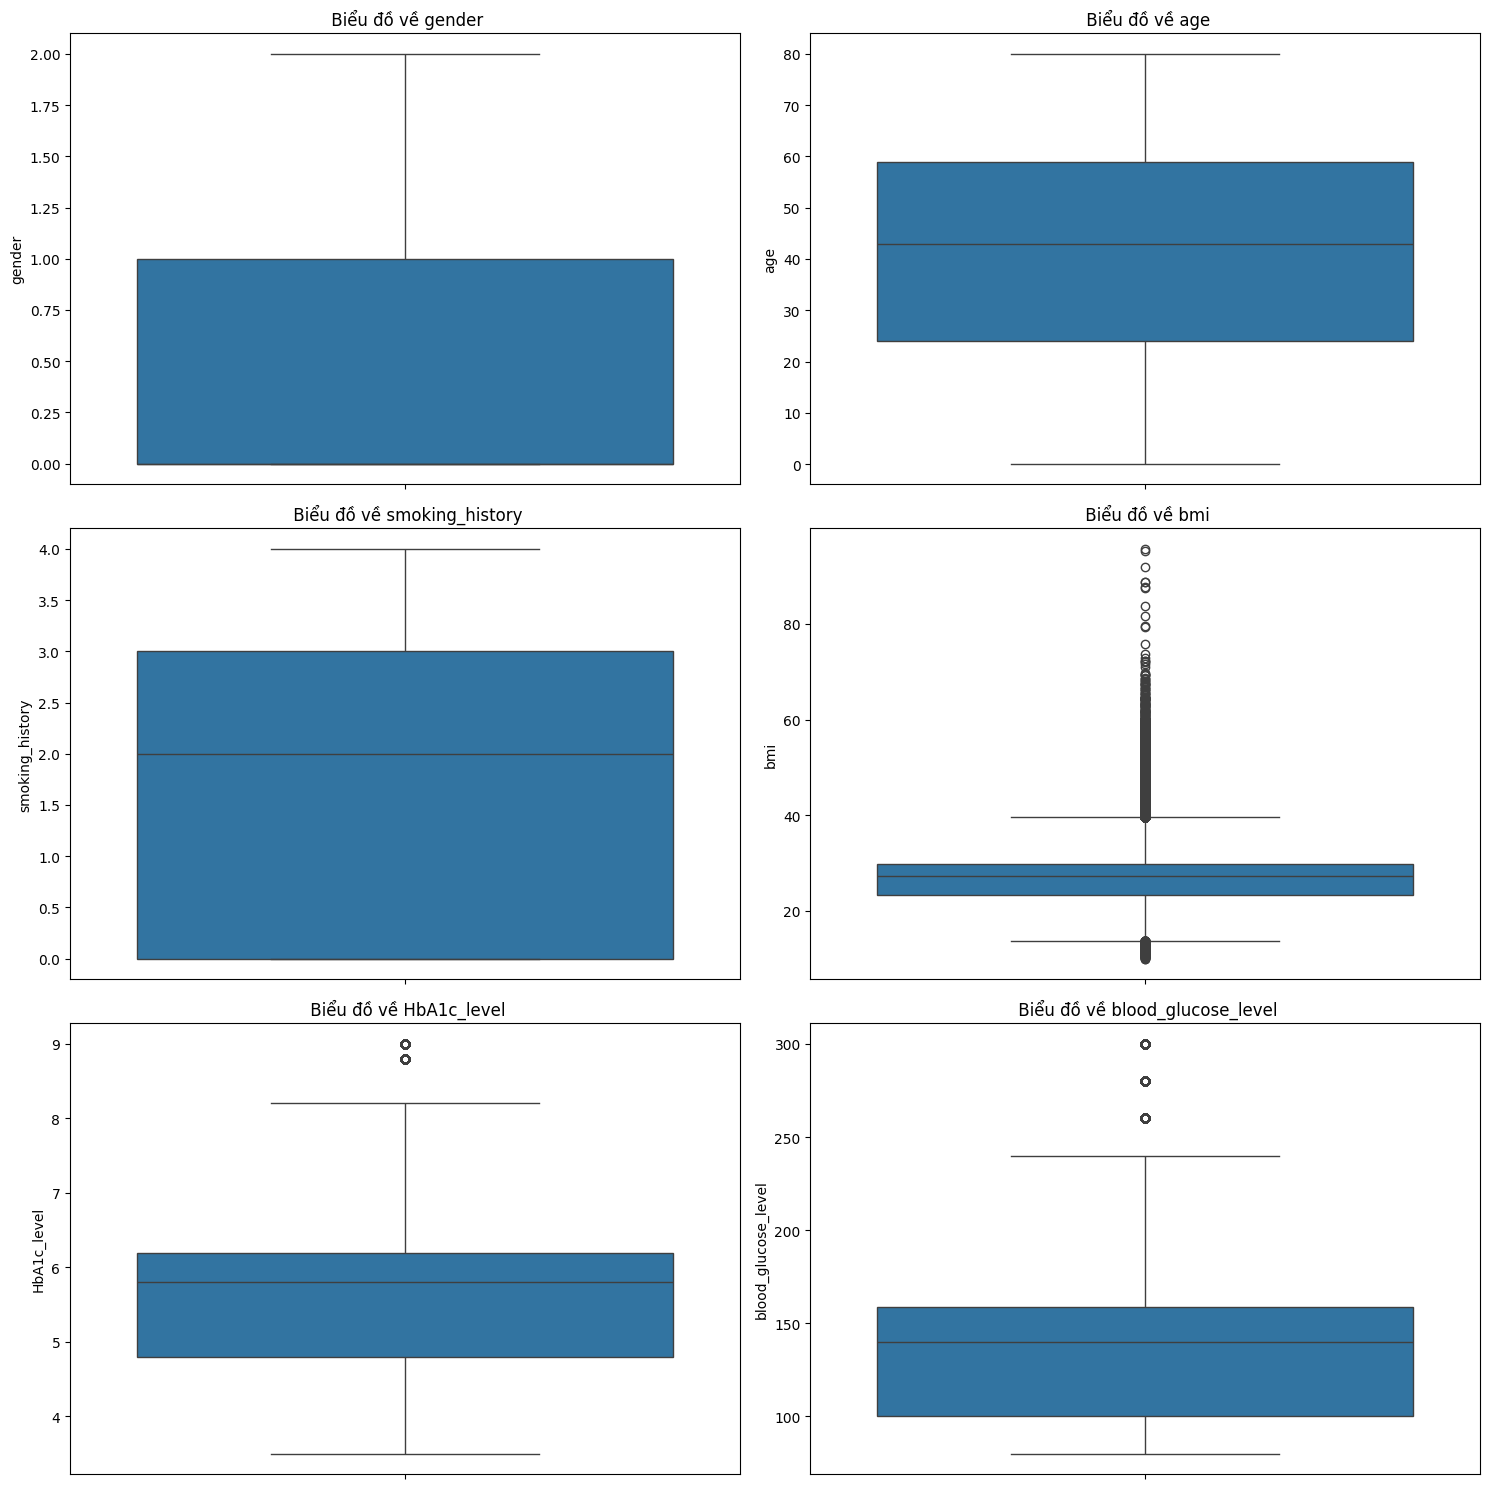

In [71]:
# vẽ biểu đồ đánh giá dữ liệu
features = ['gender', 'age', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    sns.boxplot(y=df[feature], ax=ax[row, col])
    ax[row, col].set_title(f' Biểu đồ về {feature}')
    ax[row, col].set_xlabel('')
plt.tight_layout()
plt.show()

In [72]:
# biểu đồ sau khi loại bỏ bớt outline
df.loc[df['bmi'] > 45, 'bmi'] = 45
df.loc[df['bmi'] < 15, 'bmi'] = 15
df.loc[df['HbA1c_level'] >= 8, 'HbA1c_level'] = 8
df.loc[df['blood_glucose_level'] >= 250, 'blood_glucose_level'] = 250


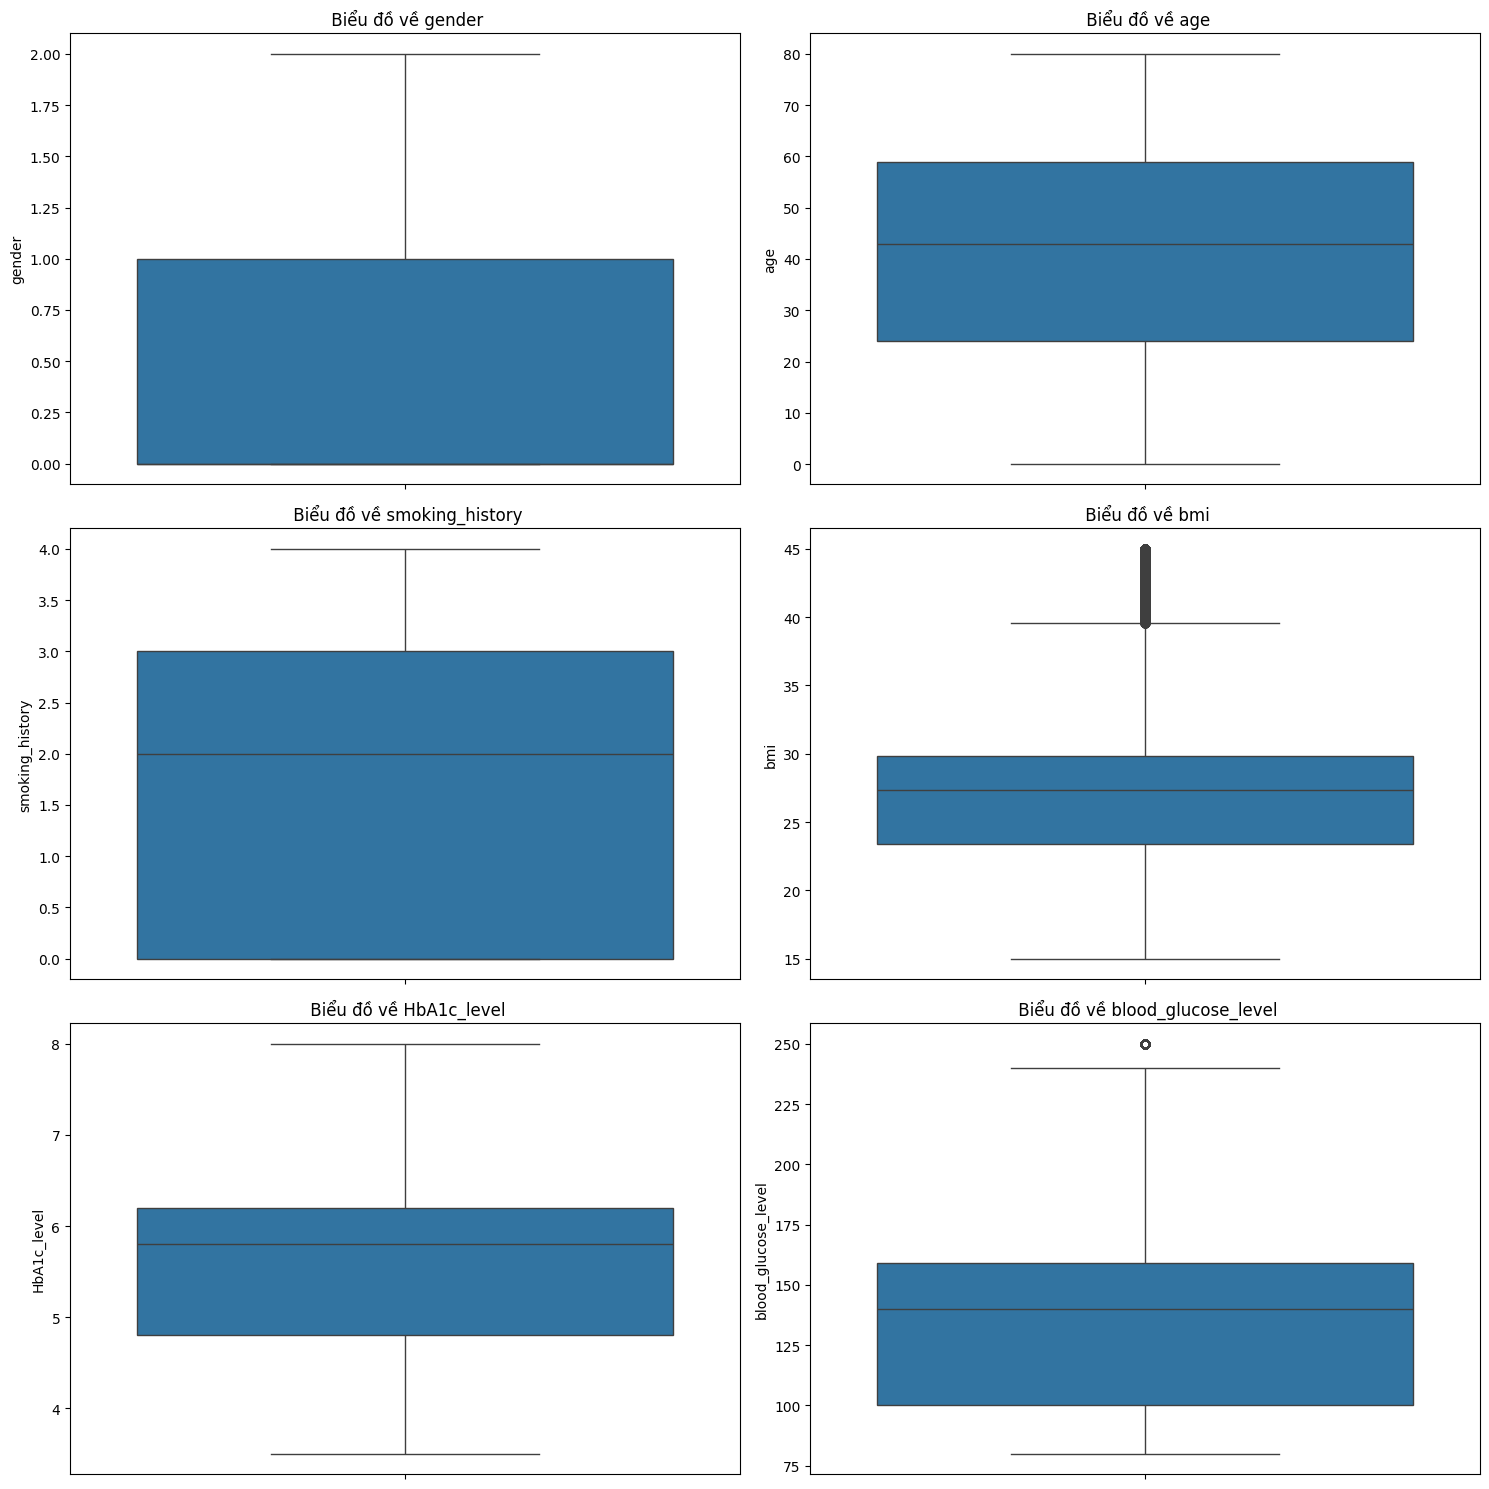

In [73]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    sns.boxplot(y=df[feature], ax=ax[row, col])
    ax[row, col].set_title(f' Biểu đồ về {feature}')
    ax[row, col].set_xlabel('')
plt.tight_layout()
plt.show()

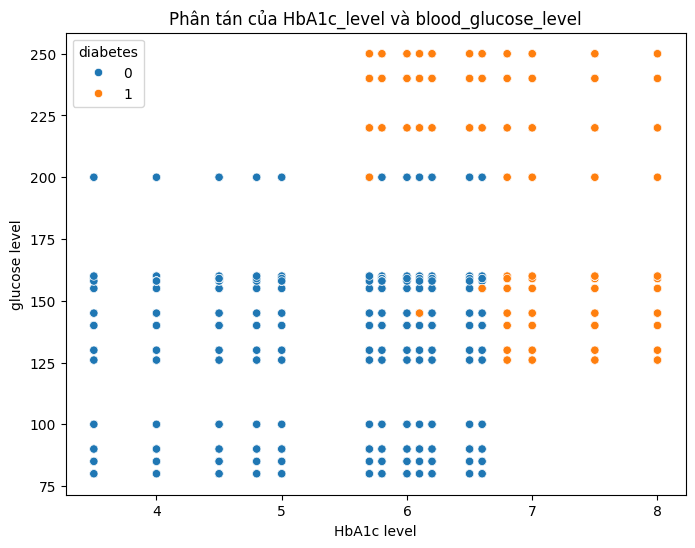

In [74]:
# đánh giá sự phân tán của HbA1c và blood_glucose
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='HbA1c_level', y='blood_glucose_level', hue='diabetes')
plt.title('Phân tán của HbA1c_level và blood_glucose_level')
plt.xlabel('HbA1c level')
plt.ylabel('glucose level')
plt.show()

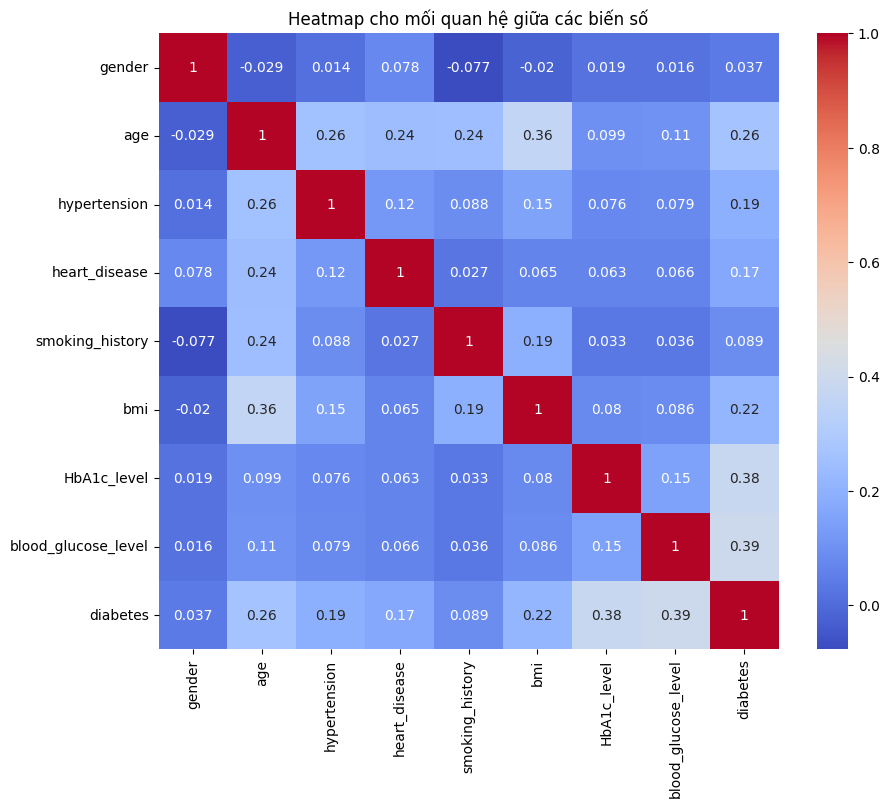

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap cho mối quan hệ giữa các biến số')
plt.show()

In [ ]:

# Giả sử df là DataFrame ban đầu
# dataset_new cần dùng để dự đoán
# Thay thế các giá trị 0 bằng NaN trong các cột liên quan
features = ['bmi', 'HbA1c_level', 'blood_glucose_level']
df[features] = df[features].replace(0, np.nan)


In [ ]:
# Điền các giá trị NaN bằng giá trị trung bình của cột
for col in features:
    df[col].fillna(df[col].mean(), inplace=True)

In [119]:
# Chuẩn hóa các thuộc tính bằng MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
df_scaled = sc.fit_transform(df)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,3,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99370,0,22.0,0,0,4,34.94,6.6,130,0
99371,1,10.0,0,0,0,17.27,6.5,158,0
99372,0,25.0,0,0,0,27.32,6.1,126,0
99373,0,47.0,0,0,3,28.64,4.8,100,0


In [135]:
# Chuyển đổi dataset_scaled thành DataFrame để dễ dàng thao tác (tùy chọn)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df.columns


diabetes
0    87000
1     8428
Name: count, dtype: int64

In [91]:
X = df_scaled.iloc[:, [1, 2, 5, 6, 7]].values
y = df_scaled.iloc[:, [8]].values
y


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[0.83733734, 0.        , 0.41066667, 0.51111111, 0.05882353],
       [0.3993994 , 0.        , 0.818     , 0.66666667, 0.45882353],
       [0.74974975, 0.        , 0.178     , 0.68888889, 0.38235294],
       ...,
       [0.12412412, 0.        , 0.35166667, 0.        , 0.        ],
       [0.46196196, 0.        , 0.332     , 0.6       , 0.45882353],
       [0.44944945, 0.        , 0.419     , 0.28888889, 0.35294118]])

In [95]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators=41, criterion='entropy', random_state=42)
ranfor.fit(X_train, y_train)

f:\Users\tran1\anaconda3\envs\vent\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=41, random_state=42)

In [120]:
y_predict = ranfor.predict(X_test)
type(X_test)

numpy.ndarray

In [100]:
ranfor.score(X_test, y_test)

0.9644765796919208

In [105]:
pickle.dump(ranfor, open('model_v2.pkl', 'wb'))



In [115]:
pickle.dump(sc, open('sc.pkl', 'wb'))

In [116]:
modelmy = pickle.load(open('model_v2.pkl', 'rb'))
scmy = pickle.load(open('sc.pkl', 'rb'))


In [107]:
y_predictmy = modelmy.predict(X_test)
y_predictmy

array([1., 0., 0., ..., 0., 0., 0.])

In [127]:
# dữ liệu dang dict
data_my = {
    
    'age': [44.0,67,42],
    'hypertension': [0,0,0],
  
   
    'bmi': [19.31,27.32,24.48],
    'HbA1c_level': [6.5,6.5,5.0],
    'blood_glucose_level': [200,200,158]
}
# chuyen sang dataframe
X_my = pd.DataFrame(data_my)
X_my

# chuan hoa du lieu
#scmy.transform(X_my)

# Chuyển đổi thành DataFrame
# probability= ranfor.predict_proba(X_my)
# print( ranfor.predict(X_my))
# probability_of_diabetes = probability[0][1] * 100
# print(probability[0][1] * 100,probability[1][1] * 100,probability[2][1] * 100)
# print(probability_of_diabetes)

,age,hypertension,bmi,HbA1c_level,blood_glucose_level
0,44.0,0,19.31,6.5,200
1,67.0,0,27.32,6.5,200
2,42.0,0,24.48,5.0,158


In [129]:
# thử biến liểu dataframe thành numpy array
X_my_num = X_my.iloc[:, [0,1, 2, 3, 4]].values
modelmy.predict(X_my_num)

array([1., 1., 1.])

In [130]:
features_my = [1, 2, 3, 4, 5]

type(features_my)

list

In [132]:
features_array_my = np.array(features_my).reshape(1, -1)
(features_array_my)

array([[1, 2, 3, 4, 5]])